In this notebook, I want to do explanatory data analysis(EDA).  

Tips: If your kernel died when deal big data, it is better to use DASK. Please check following url.  
https://www.kabuku.co.jp/developers/eda_with_dask

#Load packages and data

In [1]:
import numpy as np # linear algebra
import math
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.plotting import scatter_matrix

In [4]:
#Load data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#Load sub data
sub = pd.read_csv("sample_submission.csv")
structures = pd.read_csv("structures.csv")
scalar_coupling_contributions = pd.read_csv("scalar_coupling_contributions.csv")
magnetic_shielding_tesors = pd.read_csv("magnetic_shielding_tensors.csv")
dipole_moments = pd.read_csv("dipole_moments.csv")
potential_energy = pd.read_csv("potential_energy.csv")
mulliken_charges = pd.read_csv("mulliken_charges.csv")

In [5]:
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


In [11]:
print(train.shape)
print(test.shape)
print(sub.shape)
print(structures.shape)
print(scalar_coupling_contributions.shape)
print(magnetic_shielding_tesors.shape)
print(dipole_moments.shape)
print(potential_energy.shape)
print(mulliken_charges.shape)

#check number of unique data 
print(train["molecule_name"].nunique())
print(test["molecule_name"].nunique())
print(structures["atom"].nunique())
print(train["type"].nunique())

(4658147, 6)
(2505542, 5)
(2505542, 2)
(2358657, 6)
(4658147, 8)
(1533537, 11)
(85003, 4)
(85003, 2)
(1533537, 3)
85003
45772
5
8


In above result, our train dataset contain 85003 molecules, and test dataset contain 45772 molecules.  
That's so big data!  
  
In addition, the type of coupling is 8, and the unique atoms which contain dataset is 5.

#EDA  
##Training data

In [12]:
train.describe()

,id,atom_index_0,atom_index_1,scalar_coupling_constant
count,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06
mean,2.329073e+06,1.335689e+01,5.883966e+00,1.592165e+01
std,1.344691e+06,3.267712e+00,4.993943e+00,3.494198e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-3.621860e+01
25%,1.164536e+06,1.100000e+01,2.000000e+00,-2.549780e-01
50%,2.329073e+06,1.300000e+01,5.000000e+00,2.281130e+00
75%,3.493610e+06,1.600000e+01,8.000000e+00,7.390655e+00
max,4.658146e+06,2.800000e+01,2.800000e+01,2.048800e+02


In [13]:
#check summary of each type(NMR)
types = train.groupby(["type"])
round(types.describe(), 2)

id                                                       \
          count        mean         std   min         25%        50%   
type                                                                   
1JHC   709416.0  2346857.51  1359750.29   0.0  1166458.00  2354231.0   
1JHN    43363.0  2198234.45  1515522.62  10.0   830009.50  1739167.0   
2JHC  1140674.0  2298278.18  1327977.83  20.0  1163449.00  2282503.5   
2JHH   378036.0  2438355.26  1384905.85   1.0  1264034.25  2506560.5   
2JHN   119253.0  2252639.26  1441447.92  18.0   906665.00  2067810.0   
3JHC  1510379.0  2306329.26  1292780.15  58.0  1213337.50  2314808.0   
3JHH   590611.0  2392269.95  1378776.85  23.0  1177245.50  2504265.0   
3JHN   166415.0  2287087.45  1489936.54  73.0   873372.00  2106294.0   

                           atom_index_0         ... atom_index_1        \
            75%        max        count   mean  ...          75%   max   
type                                            ...                      
1JHC  3537469.0  4658146.0     709416.0  13.39  ...          6.0  18.0   
1JHN  3556739.0  4656569.0      43363.0  12.92  ...          6.0  11.0   
2JHC  3438088.5  4658145.0    1140674.0  13.71  ...          5.0  17.0   
2JHH  3634582.5  4658120.0     378036.0  12.20  ...         16.0  28.0   
2JHN  3440880.0  4658130.0     119253.0  13.29  ...          6.0  11.0   
3JHC  3380546.0  4658144.0    1510379.0  13.69  ...          6.0  18.0   
3JHH  3621985.5  4658138.0     590611.0  12.71  ...         17.0  28.0   
3JHN  3696568.0  4658139.0     166415.0  12.87  ...          7.0  11.0   

     scalar_coupling_constant                                             \
                        count   mean    std    min    25%    50%     75%   
type                                                                       
1JHC                 709416.0  94.98  18.28  66.60  84.02  88.22  100.74   
1JHN                  43363.0  47.48  10.92  24.32  36.50  47.79   57.05   
2JHC                1140674.0  -0.27   4.52 -36.22  -2.23  -0.95    0.87   
2JHH                 378036.0 -10.29   3.98 -35.18 -12.03 -11.33   -9.64   
2JHN                 119253.0   3.12   3.67  -2.62   0.19   2.02    5.28   
3JHC                1510379.0   3.69   3.07 -18.58   1.31   2.88    5.67   
3JHH                 590611.0   4.77   3.70  -3.02   2.05   3.69    7.33   
3JHN                 166415.0   0.99   1.32  -3.17   0.11   0.66    1.44   

              
         max  
type          
1JHC  204.88  
1JHN   80.42  
2JHC   42.82  
2JHH   11.85  
2JHN   17.74  
3JHC   76.04  
3JHH   17.48  
3JHN   10.97  

[8 rows x 32 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0xb3c31f940>,
      dtype=object)

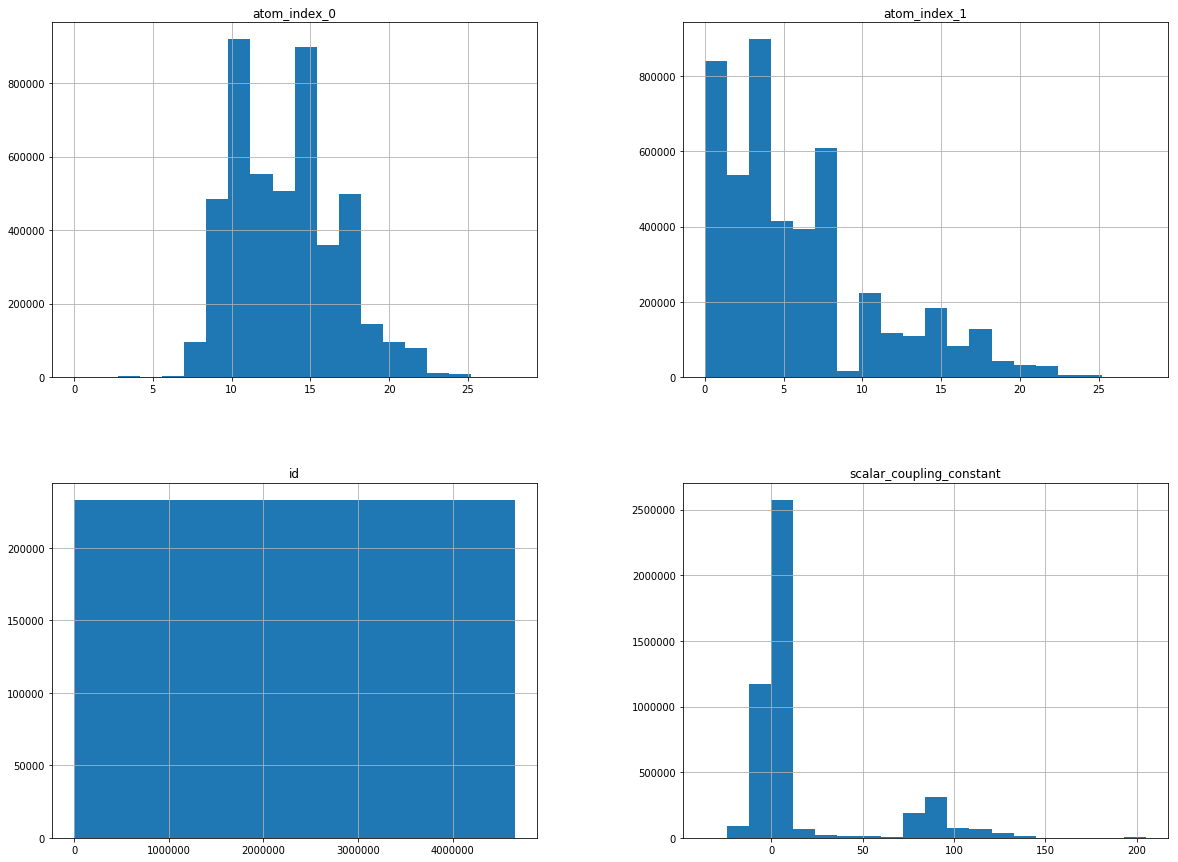

In [16]:
#check histgram of each training data
train.hist(bins=20, figsize=(20,15))

In "atom_index_1" figure, atom_index 9 looks so small count.  
I don't know this is something important charactor or not, so I only comment it.

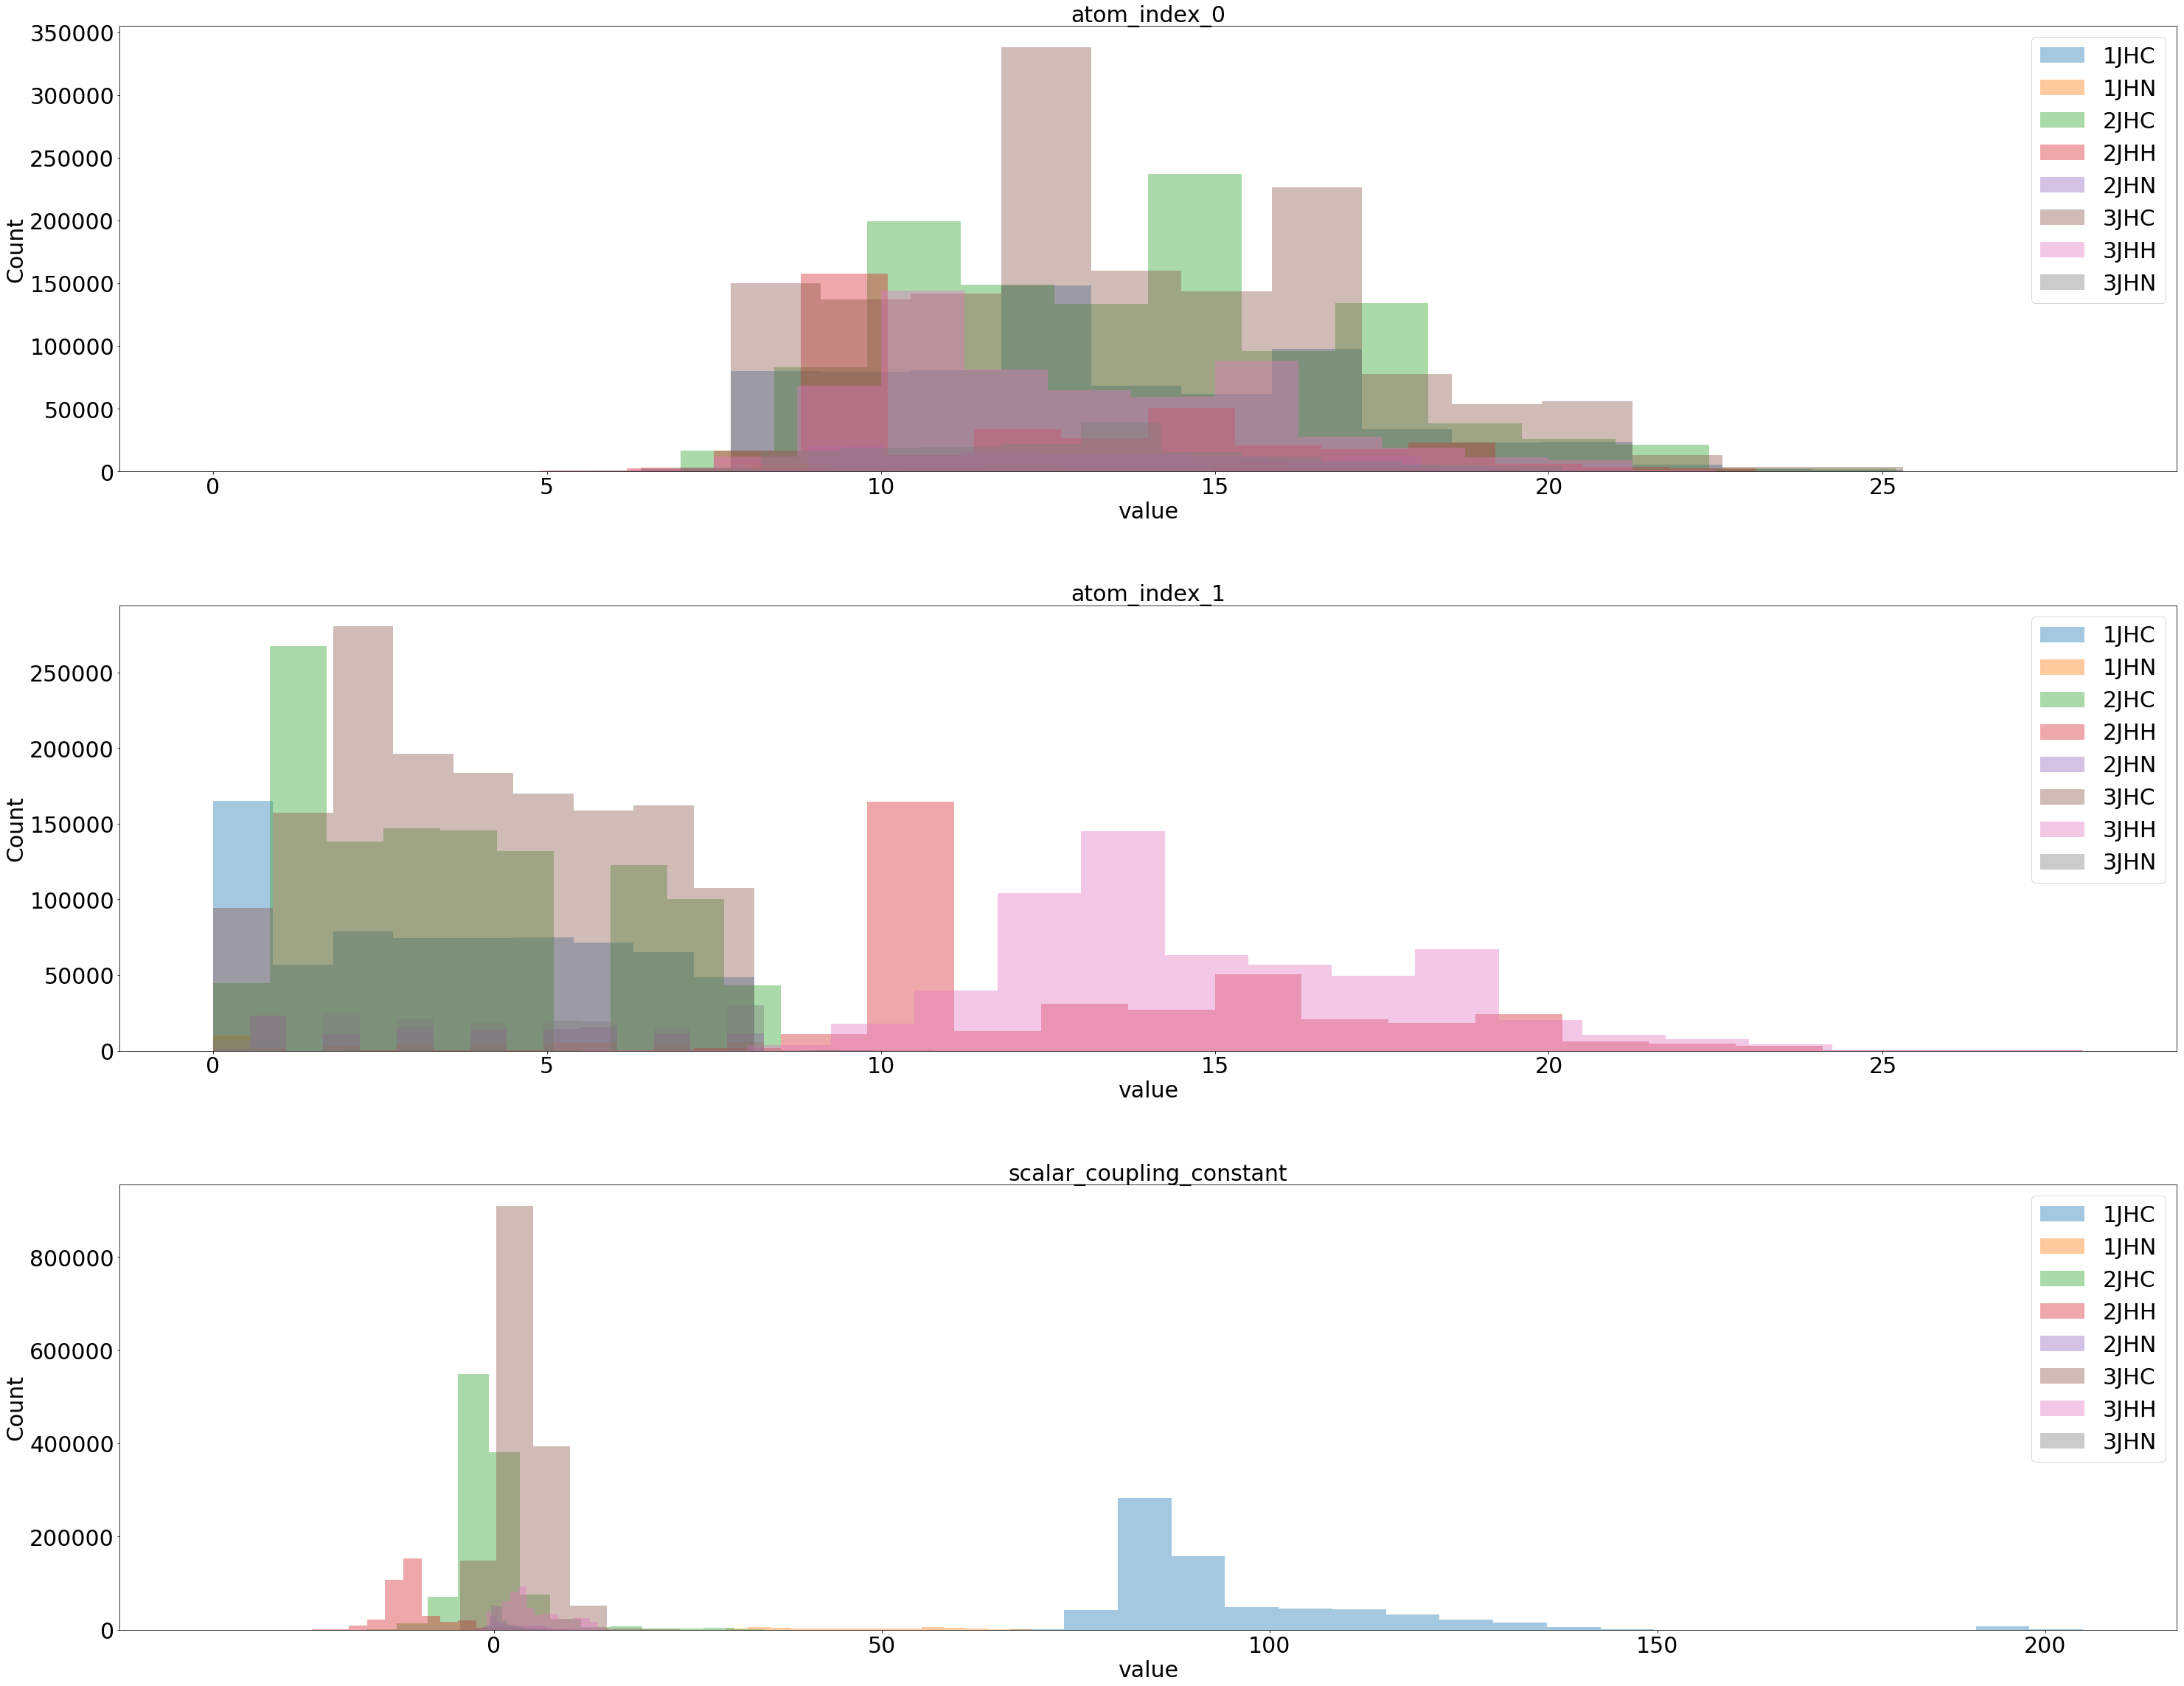

In [21]:
#check each type of histgram
fig = plt.figure(figsize=(50,40))
 
p1 = fig.add_subplot(3,1,1)
p1.hist(train.atom_index_0[train.type == '1JHC'], bins=20, alpha = .4)
p1.hist(train.atom_index_0[train.type == '1JHN'], bins=20, alpha = .4)
p1.hist(train.atom_index_0[train.type == '2JHC'], bins=20, alpha = .4)
p1.hist(train.atom_index_0[train.type == '2JHH'], bins=20, alpha = .4)
p1.hist(train.atom_index_0[train.type == '2JHN'], bins=20, alpha = .4)
p1.hist(train.atom_index_0[train.type == '3JHC'], bins=20, alpha = .4)
p1.hist(train.atom_index_0[train.type == '3JHH'], bins=20, alpha = .4)
p1.hist(train.atom_index_0[train.type == '3JHN'], bins=20, alpha = .4)
plt.title('atom_index_0', fontsize=30)
plt.xlabel('value', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.tick_params(labelsize=30)
labels = [ '1JHC','1JHN', '2JHC','2JHH', '2JHN', '3JHC', '3JHH', '3JHN']
plt.legend(labels, fontsize=30)
 
p2 = fig.add_subplot(3,1,2)
p2.hist(train.atom_index_1[train.type == '1JHC'], bins=20, alpha = .4)
p2.hist(train.atom_index_1[train.type == '1JHN'], bins=20, alpha = .4)
p2.hist(train.atom_index_1[train.type == '2JHC'], bins=20, alpha = .4)
p2.hist(train.atom_index_1[train.type == '2JHH'], bins=20, alpha = .4)
p2.hist(train.atom_index_1[train.type == '2JHN'], bins=20, alpha = .4)
p2.hist(train.atom_index_1[train.type == '3JHC'], bins=20, alpha = .4)
p2.hist(train.atom_index_1[train.type == '3JHH'], bins=20, alpha = .4)
p2.hist(train.atom_index_1[train.type == '3JHN'], bins=20, alpha = .4)
plt.title('atom_index_1', fontsize=30)
plt.xlabel('value', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.tick_params(labelsize=30)
labels = [ '1JHC','1JHN', '2JHC','2JHH', '2JHN', '3JHC', '3JHH', '3JHN']
plt.legend(labels, fontsize=30)
 
p3 = fig.add_subplot(3,1,3)
p3.hist(train.scalar_coupling_constant[train.type == '1JHC'], bins=20, alpha = .4)
p3.hist(train.scalar_coupling_constant[train.type == '1JHN'], bins=20, alpha = .4)
p3.hist(train.scalar_coupling_constant[train.type == '2JHC'], bins=20, alpha = .4)
p3.hist(train.scalar_coupling_constant[train.type == '2JHH'], bins=20, alpha = .4)
p3.hist(train.scalar_coupling_constant[train.type == '2JHN'], bins=20, alpha = .4)
p3.hist(train.scalar_coupling_constant[train.type == '3JHC'], bins=20, alpha = .4)
p3.hist(train.scalar_coupling_constant[train.type == '3JHH'], bins=20, alpha = .4)
p3.hist(train.scalar_coupling_constant[train.type == '3JHN'], bins=20, alpha = .4)
plt.title('scalar_coupling_constant', fontsize=30)
plt.xlabel('value', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.tick_params(labelsize=30)
labels =[ '1JHC','1JHN', '2JHC','2JHH', '2JHN', '3JHC', '3JHH', '3JHN']
plt.legend(labels, fontsize=30)

 
plt.subplots_adjust(wspace=.1, hspace=.3)
plt.show()

It looks there are interesting points.  
In second figure, 2JHH and 3JHH's distribution are located right side, and other types are located left side.  
In third figure, distribution devided into 1JHC and other types.

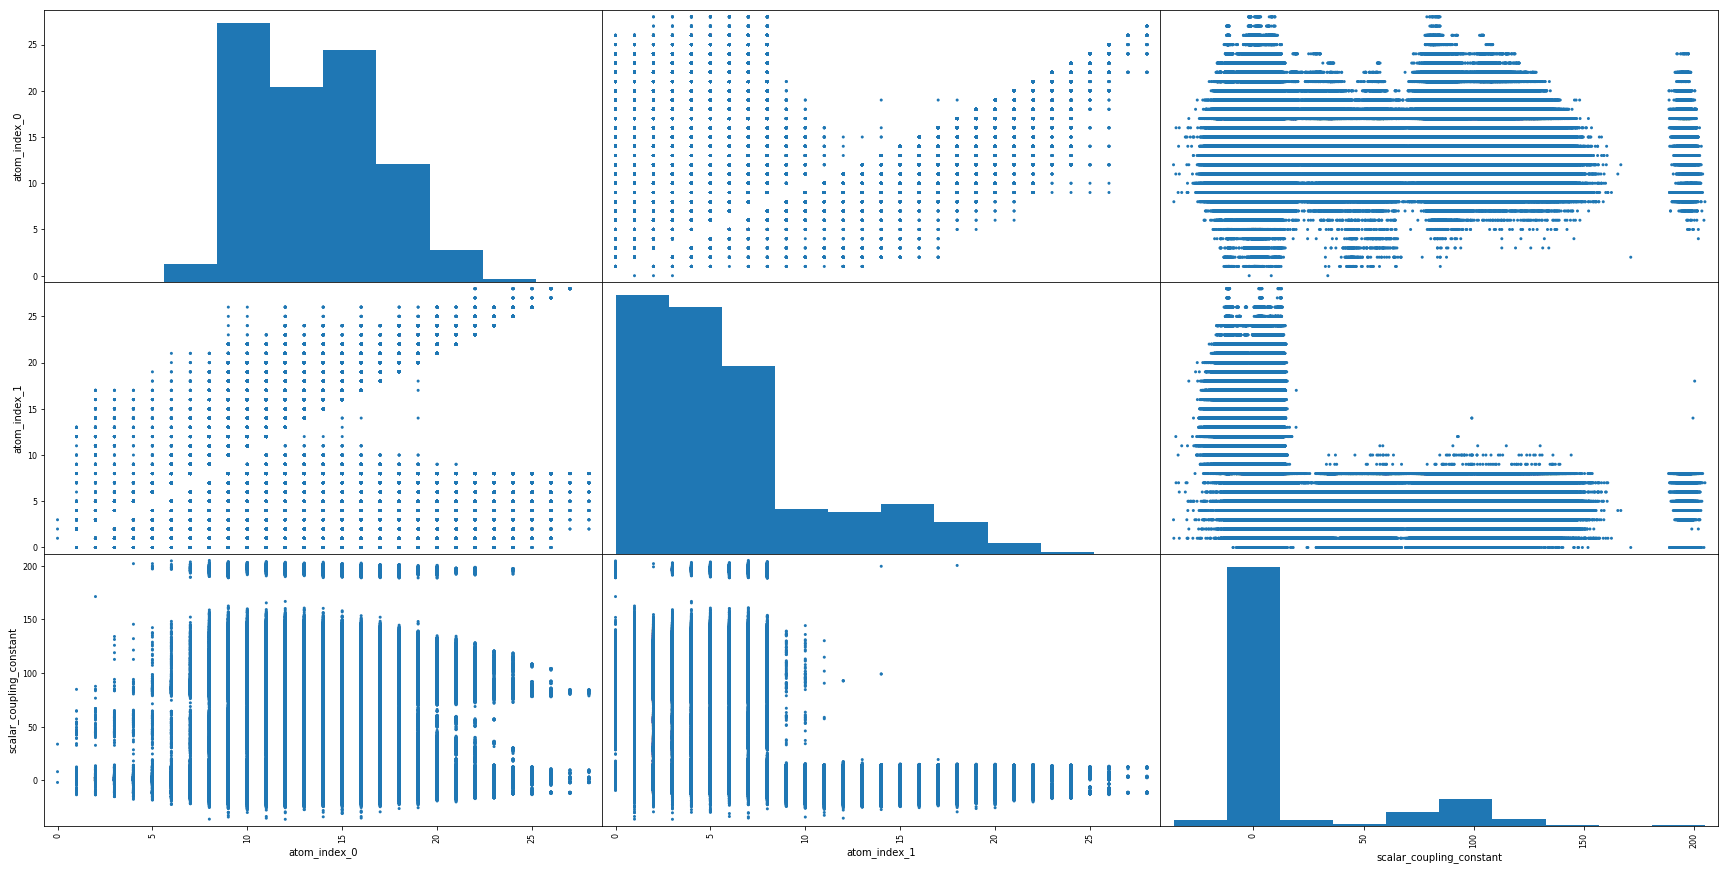

In [31]:
#check scatter matrix. This code is TOO HEAVY so don't run again.
x= scatter_matrix(train.loc[:,["atom_index_0", "atom_index_1", "scalar_coupling_constant"]], alpha=1, figsize=(30,15), diagonal="hist")

Now visualize each atom connection by networkx library.  
In this library can visualize the frequency of path.
(Another kaggler use it for vizualize. It so cool!)  
Reference:https://www.kaggle.com/artgor/molecular-properties-eda-and-models  
Reference2:https://qiita.com/tomov3/items/64f7315474747fc01a6c

In [3]:
import networkx as nx

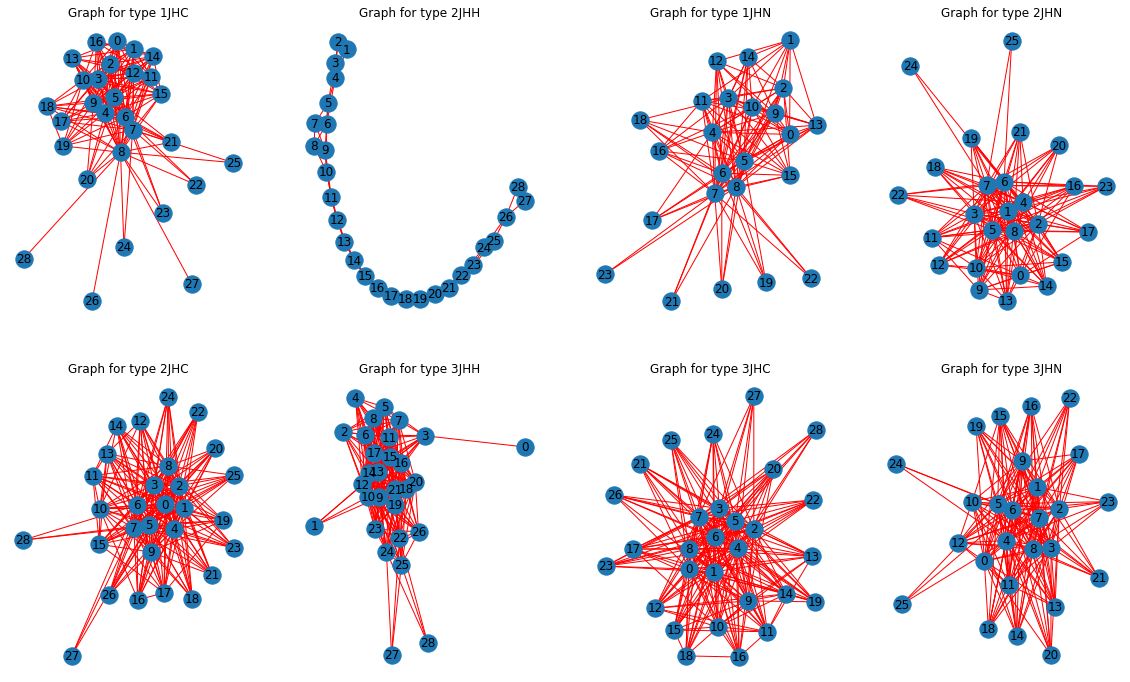

In [13]:
#Visualize each types connection between atom_index_0 and atom_index_1
fig, ax = plt.subplots(figsize = (20, 12))
for i, t in enumerate(train['type'].unique()):
    #devide dataset groupby each type 
    train_type = train.loc[train['type'] == t]
    #build graph. use pandas and networkx library.
    #First argument　is dataset, second and third are connection.
    G = nx.from_pandas_edgelist(train_type, 'atom_index_0', 'atom_index_1', edge_attr=True)#, node_size=[5000*v for v in pr.values()])
    plt.subplot(2, 4, i + 1);
    nx.draw(G, with_labels=True, edge_color="red");
    plt.title(f'Graph for type {t}')

##Test  data

In [32]:
test.head()

,id,molecule_name,atom_index_0,atom_index_1,type
0,4658147,dsgdb9nsd_000004,2,0,2JHC
1,4658148,dsgdb9nsd_000004,2,1,1JHC
2,4658149,dsgdb9nsd_000004,2,3,3JHH
3,4658150,dsgdb9nsd_000004,3,0,1JHC
4,4658151,dsgdb9nsd_000004,3,1,2JHC


In [14]:
test.describe()

,id,atom_index_0,atom_index_1
count,2.505542e+06,2.505542e+06,2.505542e+06
mean,5.910918e+06,1.335449e+01,5.877949e+00
std,7.232878e+05,3.272209e+00,4.992313e+00
min,4.658147e+06,1.000000e+00,0.000000e+00
25%,5.284532e+06,1.100000e+01,2.000000e+00
50%,5.910918e+06,1.300000e+01,5.000000e+00
75%,6.537303e+06,1.600000e+01,8.000000e+00
max,7.163688e+06,2.800000e+01,2.800000e+01


array([[<matplotlib.axes._subplots.AxesSubplot object at 0xb365107f0>,
      dtype=object)

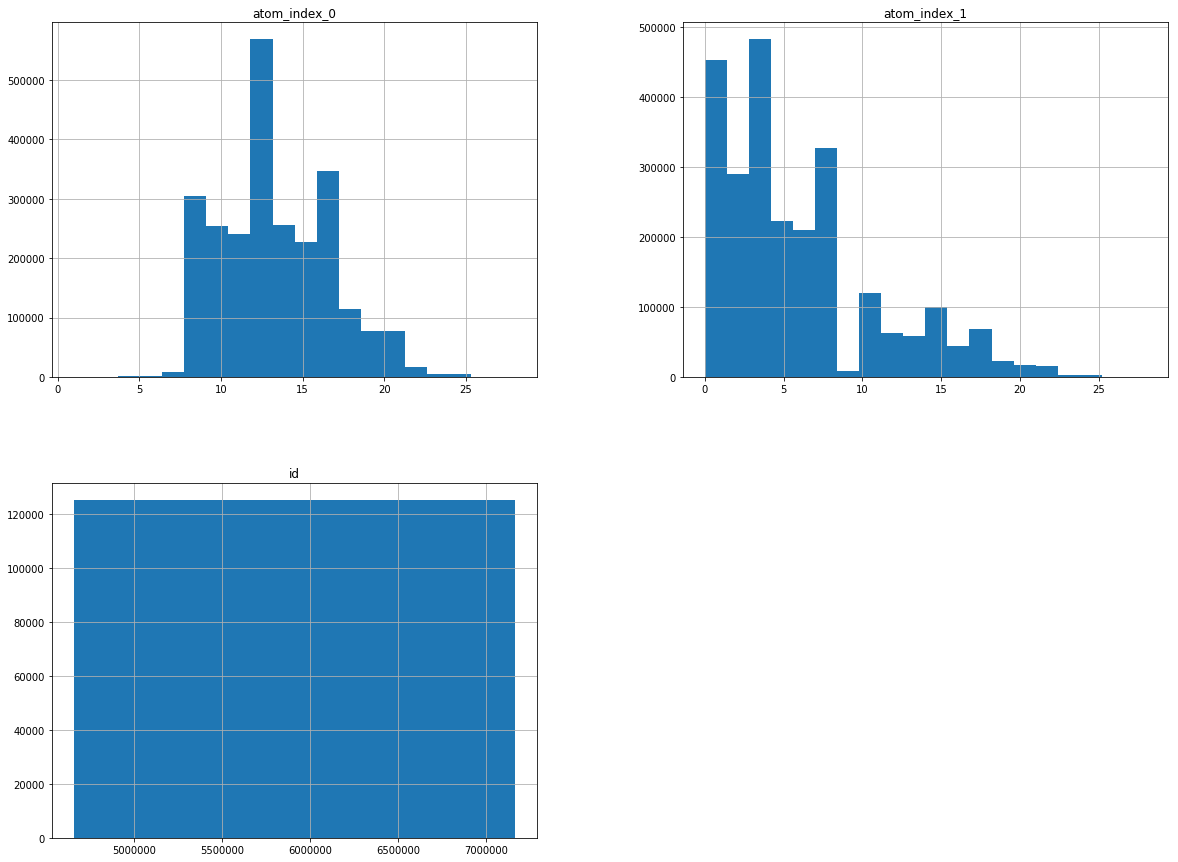

In [15]:
#check histgram of each test data
test.hist(bins=20, figsize=(20,15))

It looks close to training data histgram.

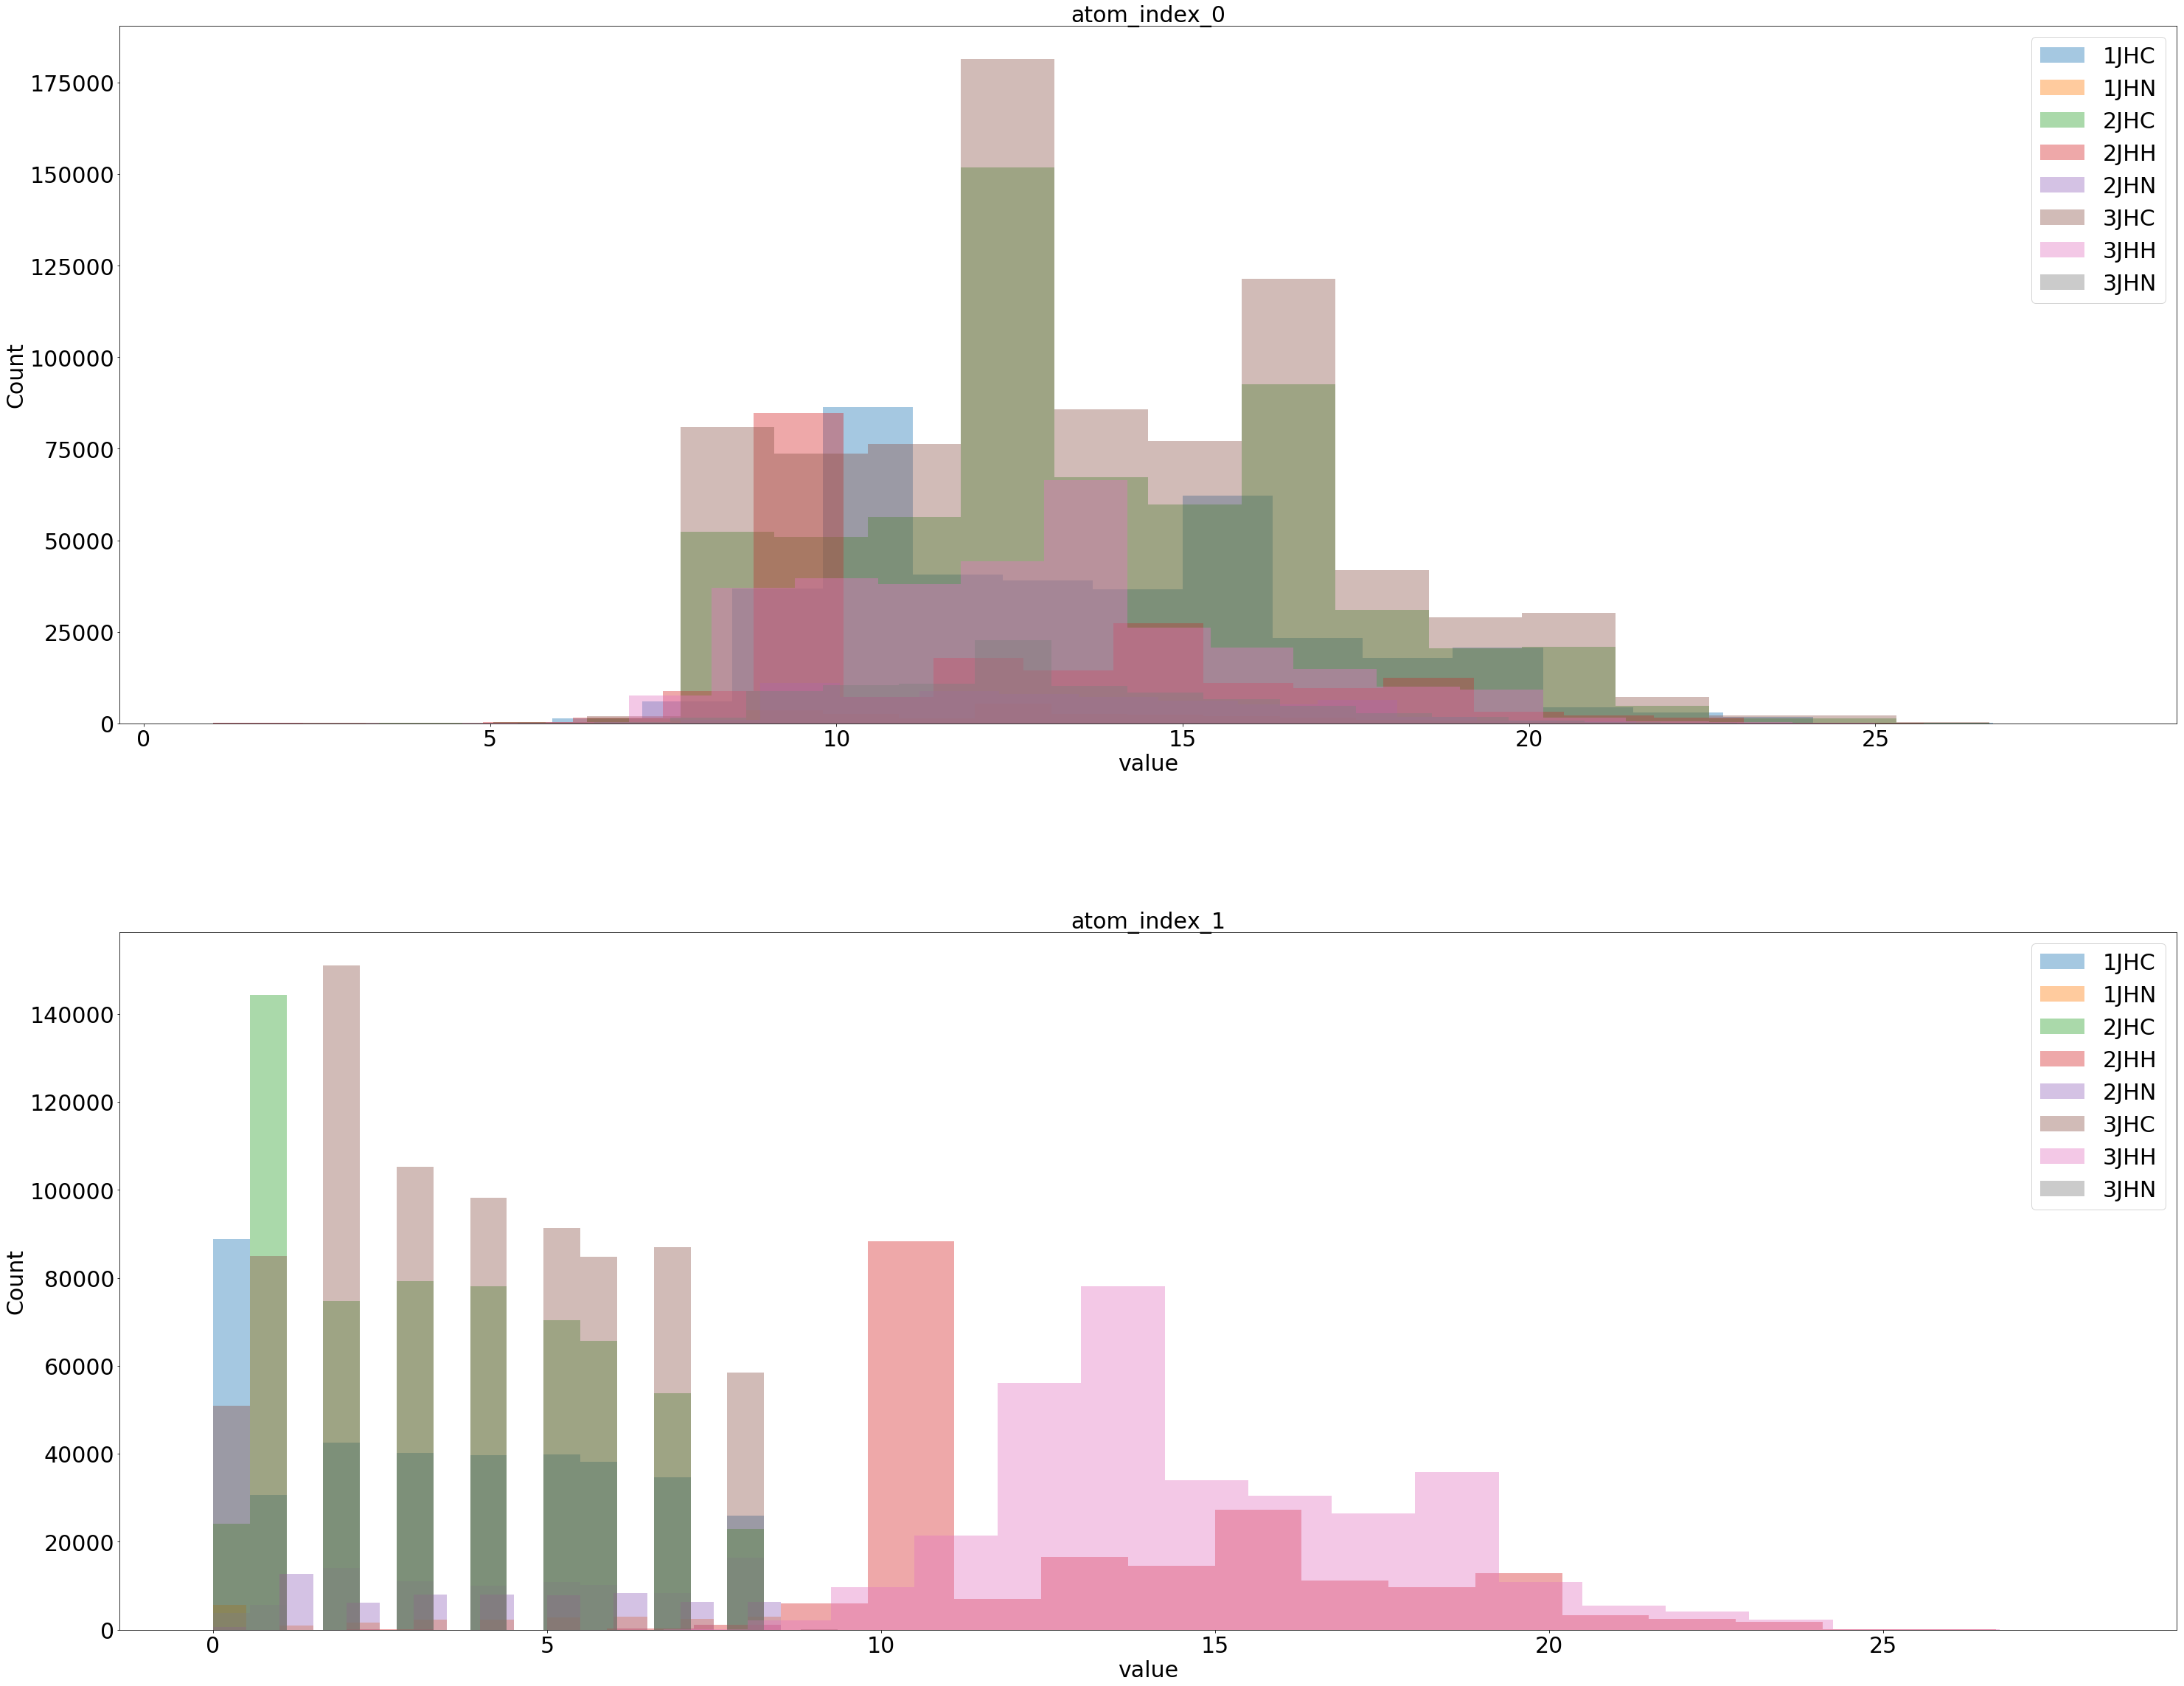

In [22]:
#check each type of histgram
fig = plt.figure(figsize=(50,40))
 
p1 = fig.add_subplot(2,1,1)
p1.hist(test.atom_index_0[test.type == '1JHC'], bins=20, alpha = .4)
p1.hist(test.atom_index_0[test.type == '1JHN'], bins=20, alpha = .4)
p1.hist(test.atom_index_0[test.type == '2JHC'], bins=20, alpha = .4)
p1.hist(test.atom_index_0[test.type == '2JHH'], bins=20, alpha = .4)
p1.hist(test.atom_index_0[test.type == '2JHN'], bins=20, alpha = .4)
p1.hist(test.atom_index_0[test.type == '3JHC'], bins=20, alpha = .4)
p1.hist(test.atom_index_0[test.type == '3JHH'], bins=20, alpha = .4)
p1.hist(test.atom_index_0[test.type == '3JHN'], bins=20, alpha = .4)
plt.title('atom_index_0', fontsize=30)
plt.xlabel('value', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.tick_params(labelsize=30)
labels = [ '1JHC','1JHN', '2JHC','2JHH', '2JHN', '3JHC', '3JHH', '3JHN']
plt.legend(labels, fontsize=30)
 
p2 = fig.add_subplot(2,1,2)
p2.hist(test.atom_index_1[test.type == '1JHC'], bins=20, alpha = .4)
p2.hist(test.atom_index_1[test.type == '1JHN'], bins=20, alpha = .4)
p2.hist(test.atom_index_1[test.type == '2JHC'], bins=20, alpha = .4)
p2.hist(test.atom_index_1[test.type == '2JHH'], bins=20, alpha = .4)
p2.hist(test.atom_index_1[test.type == '2JHN'], bins=20, alpha = .4)
p2.hist(test.atom_index_1[test.type == '3JHC'], bins=20, alpha = .4)
p2.hist(test.atom_index_1[test.type == '3JHH'], bins=20, alpha = .4)
p2.hist(test.atom_index_1[test.type == '3JHN'], bins=20, alpha = .4)
plt.title('atom_index_1', fontsize=30)
plt.xlabel('value', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.tick_params(labelsize=30)
labels = [ '1JHC','1JHN', '2JHC','2JHH', '2JHN', '3JHC', '3JHH', '3JHN']
plt.legend(labels, fontsize=30)
 
 
plt.subplots_adjust(wspace=.1, hspace=.3)
plt.show()

Wow, atom_index_1 histgram looks different from training data. (I use same bins)  
I don't know this discreate like histgram meaning at now. 

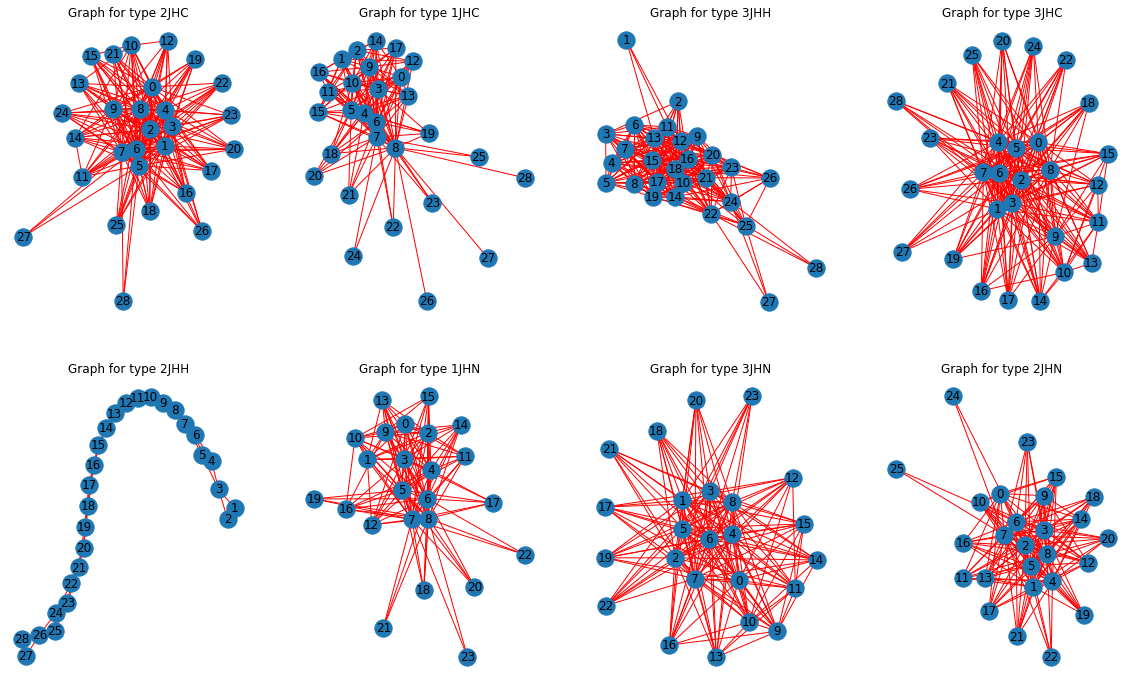

In [23]:
#Visualize each types connection between atom_index_0 and atom_index_1
fig, ax = plt.subplots(figsize = (20, 12))
for i, t in enumerate(test['type'].unique()):
    #devide dataset groupby each type 
    test_type = test.loc[test['type'] == t]
    #build graph. use pandas and networkx library.
    #First argument　is dataset, second and third are connection.
    G = nx.from_pandas_edgelist(test_type, 'atom_index_0', 'atom_index_1', edge_attr=True)#, node_size=[5000*v for v in pr.values()])
    plt.subplot(2, 4, i + 1);
    nx.draw(G, with_labels=True, edge_color="red");
    plt.title(f'Graph for type {t}')

It looks similar to training data, so I guess the type of coupling is same between training and test dataset.

##Structures dataset  
This dataset have moreclular structures information both train and test datasets.

In [33]:
structures.head()

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


In [24]:
structures.describe()

,atom_index,x,y,z
count,2.358657e+06,2.358657e+06,2.358657e+06,2.358657e+06
mean,8.757349e+00,9.489178e-02,-3.337381e-01,6.241504e-02
std,5.592487e+00,1.655271e+00,1.989152e+00,1.445870e+00
min,0.000000e+00,-9.234889e+00,-9.933938e+00,-9.134765e+00
25%,4.000000e+00,-8.746097e-01,-1.826156e+00,-8.424896e-01
50%,9.000000e+00,5.183615e-02,-4.035932e-01,1.093207e-02
75%,1.300000e+01,1.116101e+00,1.373660e+00,9.394357e-01
max,2.800000e+01,9.382240e+00,1.018196e+01,7.894733e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110655f98>,
      dtype=object)

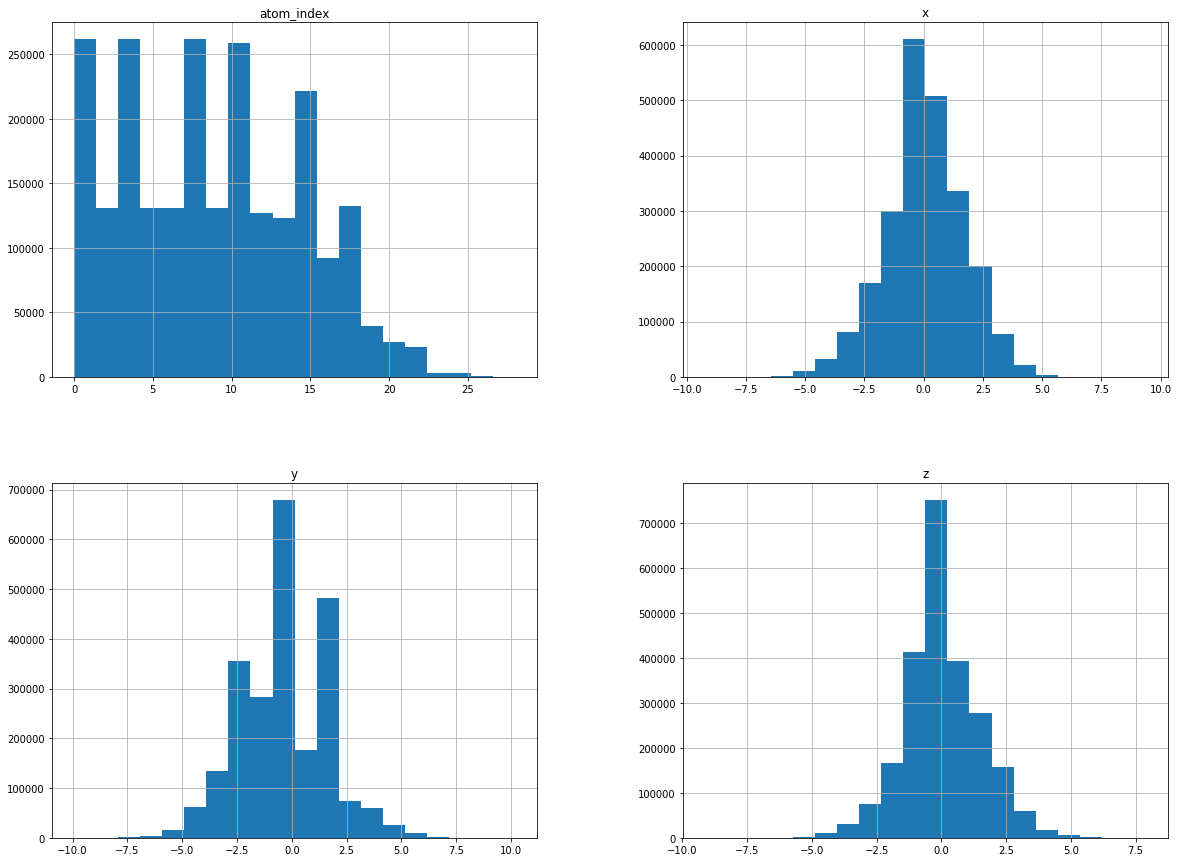

In [26]:
#check histgram of each structure data
structures.hist(bins=20, figsize=(20,15))

##Scalar Coupling Contribution

In [34]:
scalar_coupling_contributions.head()

,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso
0,dsgdb9nsd_000001,1,0,1JHC,83.0224,0.254579,1.25862,0.272010
1,dsgdb9nsd_000001,1,2,2JHH,-11.0347,0.352978,2.85839,-3.433600
2,dsgdb9nsd_000001,1,3,2JHH,-11.0325,0.352944,2.85852,-3.433870
3,dsgdb9nsd_000001,1,4,2JHH,-11.0319,0.352934,2.85855,-3.433930
4,dsgdb9nsd_000001,2,0,1JHC,83.0222,0.254585,1.25861,0.272013


In [27]:
scalar_coupling_contributions.describe()

,atom_index_0,atom_index_1,fc,sd,pso,dso
count,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06
mean,1.335689e+01,5.883966e+00,1.569776e+01,8.233637e-02,3.751619e-01,-2.336117e-01
std,3.267712e+00,4.993943e+00,3.441461e+01,1.386516e-01,7.422133e-01,9.296036e-01
min,0.000000e+00,0.000000e+00,-3.722400e+01,-3.184910e+00,-3.288110e+00,-6.856790e+00
25%,1.100000e+01,2.000000e+00,-2.129645e-01,-1.438100e-02,-3.506500e-02,-3.734250e-01
50%,1.300000e+01,5.000000e+00,2.327140e+00,5.072900e-02,1.594810e-01,-6.476600e-02
75%,1.600000e+01,8.000000e+00,7.472885e+00,1.303520e-01,4.350445e-01,1.433210e-01
max,2.800000e+01,2.800000e+01,2.055170e+02,2.296690e+00,8.201530e+00,1.701610e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1106f06a0>,
      dtype=object)

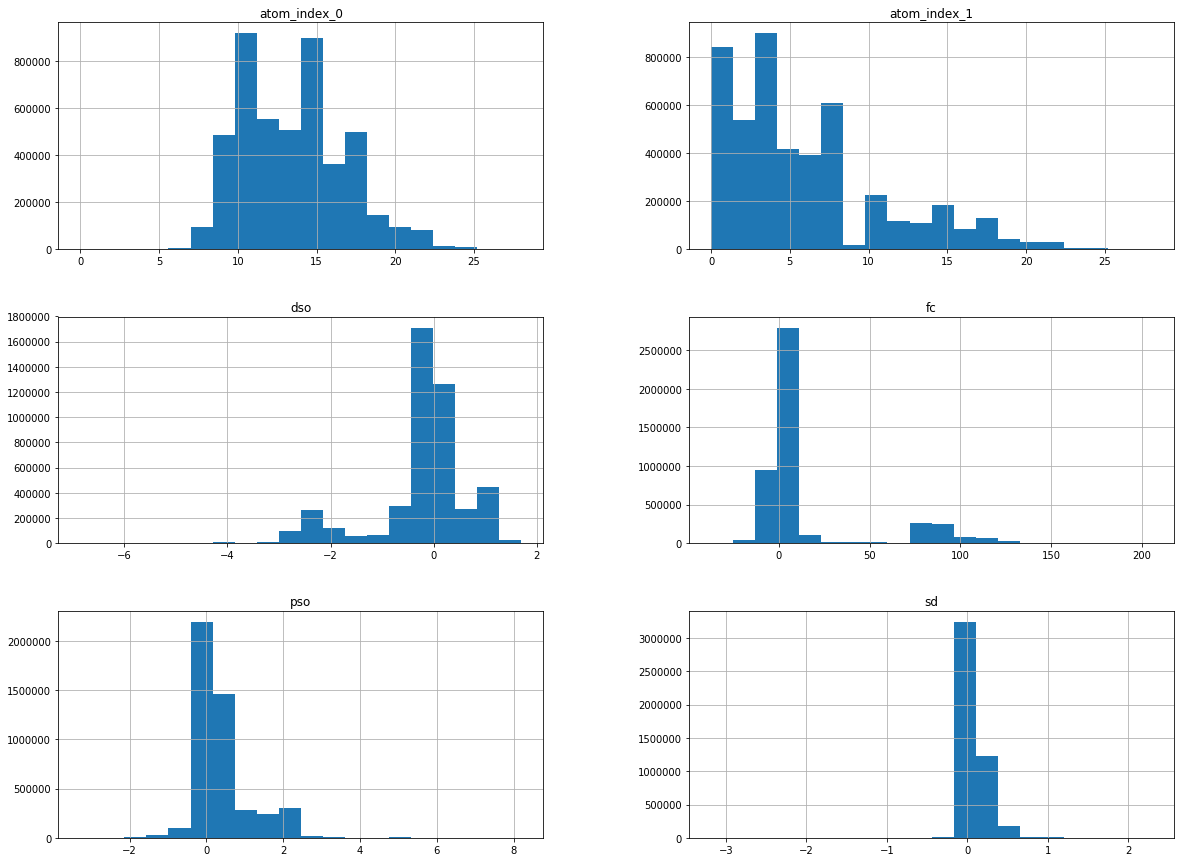

In [28]:
#check histgram of each scalar_coupling_contributions data
scalar_coupling_contributions.hist(bins=20, figsize=(20,15))

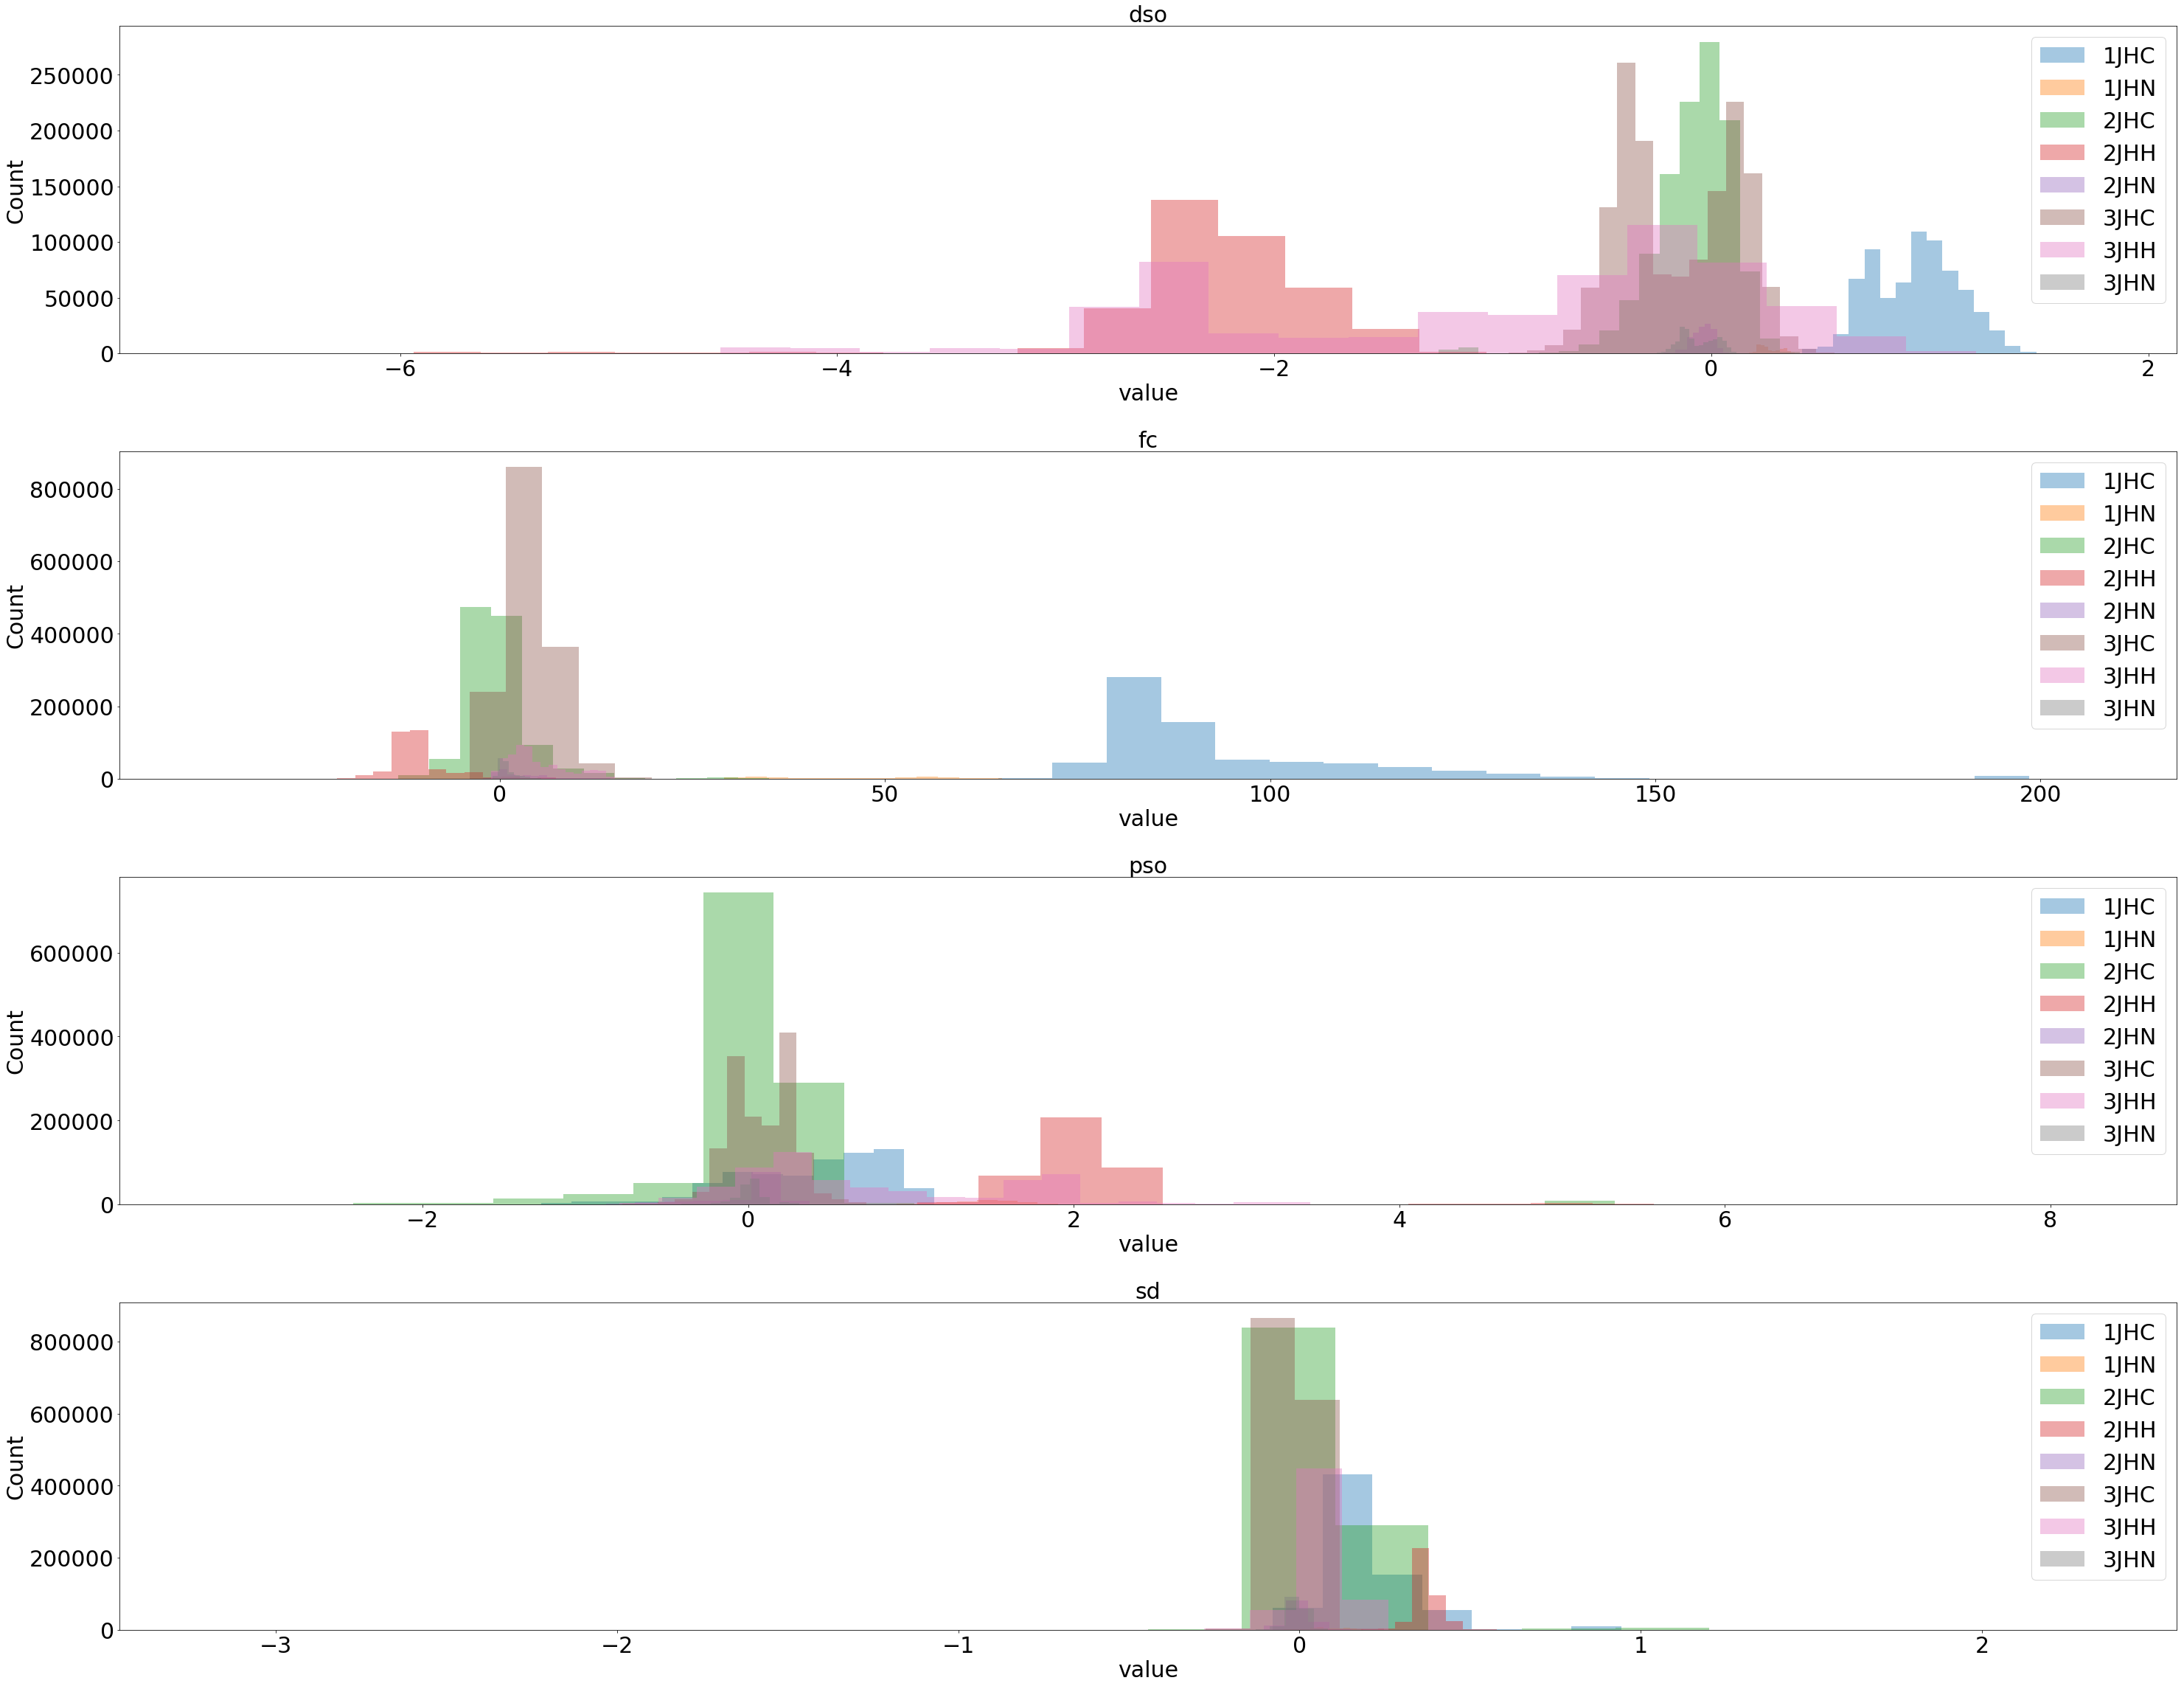

In [29]:
#check each type of histgram
fig = plt.figure(figsize=(50,40))
 
p1 = fig.add_subplot(4,1,1)
p1.hist(scalar_coupling_contributions.dso[scalar_coupling_contributions.type == '1JHC'], bins=20, alpha = .4)
p1.hist(scalar_coupling_contributions.dso[scalar_coupling_contributions.type == '1JHN'], bins=20, alpha = .4)
p1.hist(scalar_coupling_contributions.dso[scalar_coupling_contributions.type == '2JHC'], bins=20, alpha = .4)
p1.hist(scalar_coupling_contributions.dso[scalar_coupling_contributions.type == '2JHH'], bins=20, alpha = .4)
p1.hist(scalar_coupling_contributions.dso[scalar_coupling_contributions.type == '2JHN'], bins=20, alpha = .4)
p1.hist(scalar_coupling_contributions.dso[scalar_coupling_contributions.type == '3JHC'], bins=20, alpha = .4)
p1.hist(scalar_coupling_contributions.dso[scalar_coupling_contributions.type == '3JHH'], bins=20, alpha = .4)
p1.hist(scalar_coupling_contributions.dso[scalar_coupling_contributions.type == '3JHN'], bins=20, alpha = .4)
plt.title('dso', fontsize=30)
plt.xlabel('value', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.tick_params(labelsize=30)
labels = [ '1JHC','1JHN', '2JHC','2JHH', '2JHN', '3JHC', '3JHH', '3JHN']
plt.legend(labels, fontsize=30)
 
p2 = fig.add_subplot(4,1,2)
p2.hist(scalar_coupling_contributions.fc[scalar_coupling_contributions.type == '1JHC'], bins=20, alpha = .4)
p2.hist(scalar_coupling_contributions.fc[scalar_coupling_contributions.type == '1JHN'], bins=20, alpha = .4)
p2.hist(scalar_coupling_contributions.fc[scalar_coupling_contributions.type == '2JHC'], bins=20, alpha = .4)
p2.hist(scalar_coupling_contributions.fc[scalar_coupling_contributions.type == '2JHH'], bins=20, alpha = .4)
p2.hist(scalar_coupling_contributions.fc[scalar_coupling_contributions.type == '2JHN'], bins=20, alpha = .4)
p2.hist(scalar_coupling_contributions.fc[scalar_coupling_contributions.type == '3JHC'], bins=20, alpha = .4)
p2.hist(scalar_coupling_contributions.fc[scalar_coupling_contributions.type == '3JHH'], bins=20, alpha = .4)
p2.hist(scalar_coupling_contributions.fc[scalar_coupling_contributions.type == '3JHN'], bins=20, alpha = .4)
plt.title('fc', fontsize=30)
plt.xlabel('value', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.tick_params(labelsize=30)
labels = [ '1JHC','1JHN', '2JHC','2JHH', '2JHN', '3JHC', '3JHH', '3JHN']
plt.legend(labels, fontsize=30)
 
p3 = fig.add_subplot(4,1,3)
p3.hist(scalar_coupling_contributions.pso[scalar_coupling_contributions.type == '1JHC'], bins=20, alpha = .4)
p3.hist(scalar_coupling_contributions.pso[scalar_coupling_contributions.type == '1JHN'], bins=20, alpha = .4)
p3.hist(scalar_coupling_contributions.pso[scalar_coupling_contributions.type == '2JHC'], bins=20, alpha = .4)
p3.hist(scalar_coupling_contributions.pso[scalar_coupling_contributions.type == '2JHH'], bins=20, alpha = .4)
p3.hist(scalar_coupling_contributions.pso[scalar_coupling_contributions.type == '2JHN'], bins=20, alpha = .4)
p3.hist(scalar_coupling_contributions.pso[scalar_coupling_contributions.type == '3JHC'], bins=20, alpha = .4)
p3.hist(scalar_coupling_contributions.pso[scalar_coupling_contributions.type == '3JHH'], bins=20, alpha = .4)
p3.hist(scalar_coupling_contributions.pso[scalar_coupling_contributions.type == '3JHN'], bins=20, alpha = .4)
plt.title('pso', fontsize=30)
plt.xlabel('value', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.tick_params(labelsize=30)
labels = [ '1JHC','1JHN', '2JHC','2JHH', '2JHN', '3JHC', '3JHH', '3JHN']
plt.legend(labels, fontsize=30)

p4 = fig.add_subplot(4,1,4)
p4.hist(scalar_coupling_contributions.sd[scalar_coupling_contributions.type == '1JHC'], bins=20, alpha = .4)
p4.hist(scalar_coupling_contributions.sd[scalar_coupling_contributions.type == '1JHN'], bins=20, alpha = .4)
p4.hist(scalar_coupling_contributions.sd[scalar_coupling_contributions.type == '2JHC'], bins=20, alpha = .4)
p4.hist(scalar_coupling_contributions.sd[scalar_coupling_contributions.type == '2JHH'], bins=20, alpha = .4)
p4.hist(scalar_coupling_contributions.sd[scalar_coupling_contributions.type == '2JHN'], bins=20, alpha = .4)
p4.hist(scalar_coupling_contributions.sd[scalar_coupling_contributions.type == '3JHC'], bins=20, alpha = .4)
p4.hist(scalar_coupling_contributions.sd[scalar_coupling_contributions.type == '3JHH'], bins=20, alpha = .4)
p4.hist(scalar_coupling_contributions.sd[scalar_coupling_contributions.type == '3JHN'], bins=20, alpha = .4)
plt.title('sd', fontsize=30)
plt.xlabel('value', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.tick_params(labelsize=30)
labels = [ '1JHC','1JHN', '2JHC','2JHH', '2JHN', '3JHC', '3JHH', '3JHN']
plt.legend(labels, fontsize=30)

plt.subplots_adjust(wspace=.1, hspace=.3)
plt.show()

"dso" and "fc" and "pso" distributions are characteristic!  
In "dso" and "fc" distributions, 1JHC is leave from others.  
In "dso" and "pso", 1JHN and 3JHH are leave from others.  
Especially in "dso", 3JHH have two peek. What mean?

##magnetic_shielding_tesors

In [31]:
magnetic_shielding_tesors.head()

,molecule_name,atom_index,XX,YX,ZX,XY,YY,ZY,XZ,YZ,ZZ
0,dsgdb9nsd_000001,0,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170
1,dsgdb9nsd_000001,1,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861
2,dsgdb9nsd_000001,2,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967
3,dsgdb9nsd_000001,3,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579
4,dsgdb9nsd_000001,4,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013


In [30]:
magnetic_shielding_tesors.describe()

,atom_index,XX,YX,ZX,XY,YY,ZY,XZ,YZ,ZZ
count,1.533537e+06,1.533537e+06,1.533537e+06,1.533537e+06,1.533537e+06,1.533537e+06,1.533537e+06,1.533537e+06,1.533537e+06,1.533537e+06
mean,8.759199e+00,6.881581e+01,-9.326109e-02,9.941325e-02,-1.320880e-01,6.549244e+01,-3.228053e-02,1.055878e-01,2.729817e-02,8.261999e+01
std,5.592808e+00,1.147867e+02,3.691271e+01,3.413662e+01,3.679941e+01,1.063009e+02,3.370626e+01,3.484276e+01,3.416867e+01,8.556882e+01
min,0.000000e+00,-3.452650e+03,-7.582950e+02,-7.319900e+02,-9.447450e+02,-2.146680e+03,-6.457610e+02,-7.043470e+02,-6.542020e+02,-9.486030e+02
25%,4.000000e+00,2.804470e+01,-3.334200e+00,-2.541200e+00,-3.202000e+00,2.719330e+01,-2.795100e+00,-2.484500e+00,-2.801100e+00,2.735380e+01
50%,9.000000e+00,3.190900e+01,1.000000e-03,0.000000e+00,9.000000e-04,3.174760e+01,-0.000000e+00,0.000000e+00,0.000000e+00,3.378320e+01
75%,1.300000e+01,1.480430e+02,3.373300e+00,2.617500e+00,3.236000e+00,1.361710e+02,2.845100e+00,2.552700e+00,2.872000e+00,1.416480e+02
max,2.800000e+01,4.254020e+02,1.080230e+03,6.620490e+02,1.273990e+03,4.254660e+02,6.739150e+02,8.633610e+02,7.384150e+02,5.568840e+02


array([[<matplotlib.axes._subplots.AxesSubplot object at 0xb33824c88>,
      dtype=object)

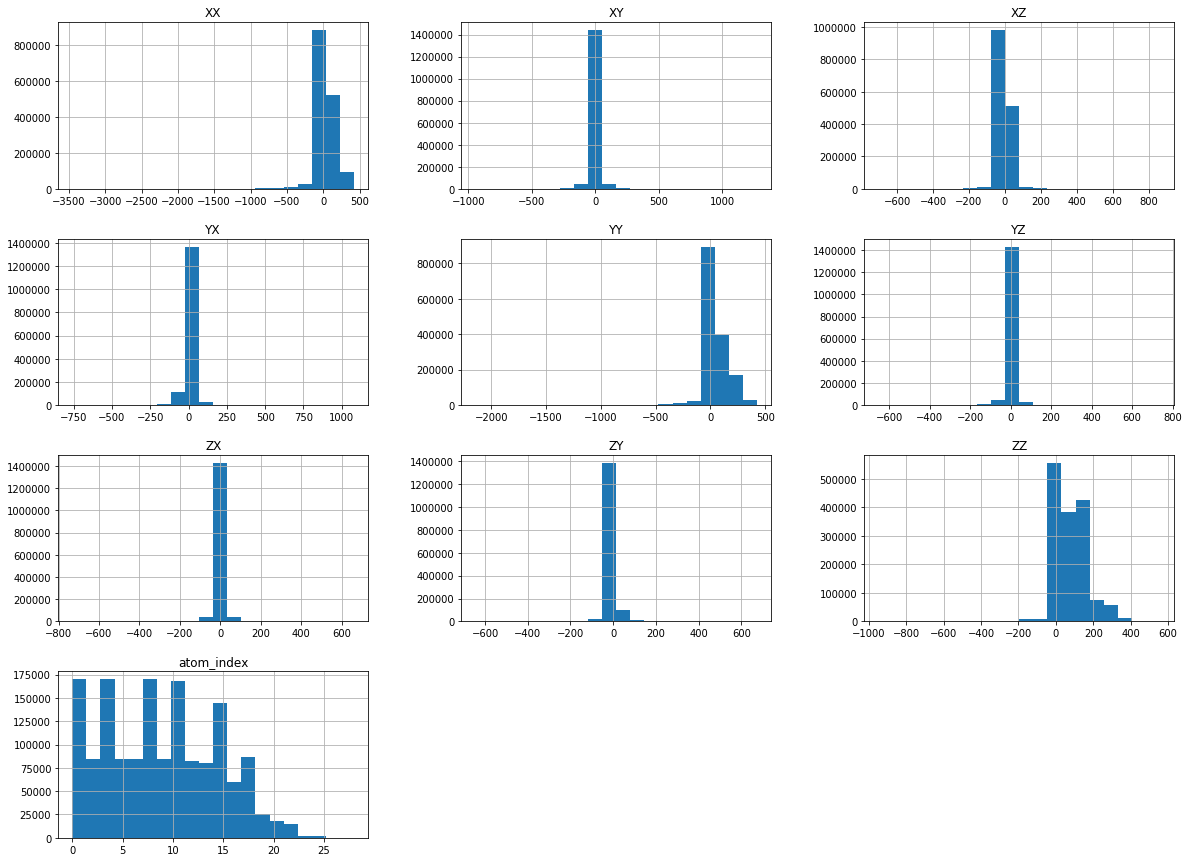

In [35]:
#check histgram of each magnetic_shielding_tesors data
magnetic_shielding_tesors.hist(bins=20, figsize=(20,15))

##dipole_moments

In [36]:
dipole_moments.head()

,molecule_name,X,Y,Z
0,dsgdb9nsd_000001,0.0000,0.0,0.0000
1,dsgdb9nsd_000002,-0.0002,0.0,1.6256
2,dsgdb9nsd_000003,0.0000,0.0,-1.8511
3,dsgdb9nsd_000005,0.0000,0.0,-2.8937
4,dsgdb9nsd_000007,0.0000,0.0,0.0000


In [37]:
dipole_moments.describe()

,X,Y,Z
count,85003.000000,85003.000000,85003.000000
mean,-0.019937,0.093764,0.252982
std,2.283738,1.739395,1.027573
min,-22.958000,-9.252300,-6.028500
25%,-1.363250,-0.941950,-0.247750
50%,-0.000100,0.081400,0.117600
75%,1.311000,1.166750,0.902050
max,21.873800,13.005600,6.880100


array([[<matplotlib.axes._subplots.AxesSubplot object at 0xb3664cb70>,
      dtype=object)

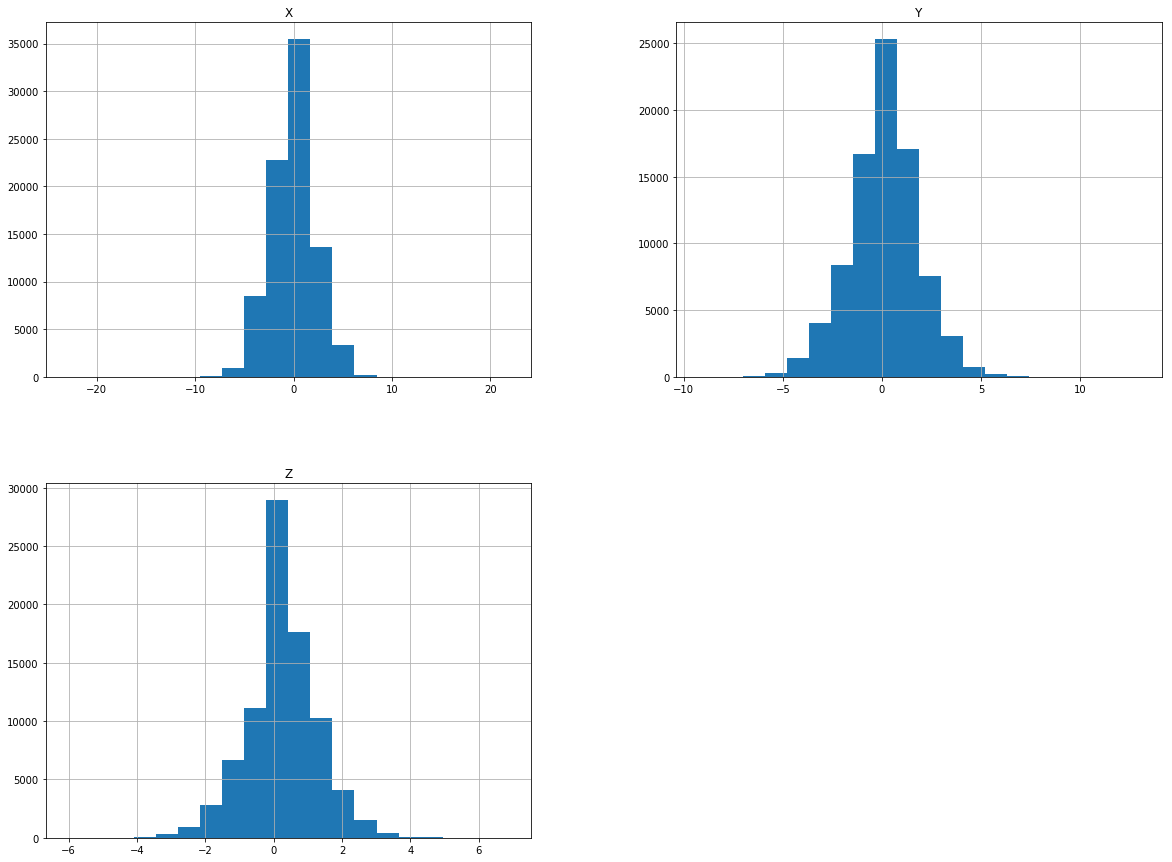

In [38]:
#check histgram of each dipole_moments data
dipole_moments.hist(bins=20, figsize=(20,15))

##potential_energy

In [39]:
potential_energy.head()

,molecule_name,potential_energy
0,dsgdb9nsd_000001,-40.52368
1,dsgdb9nsd_000002,-56.56025
2,dsgdb9nsd_000003,-76.42608
3,dsgdb9nsd_000005,-93.42849
4,dsgdb9nsd_000007,-79.83869


In [40]:
potential_energy.describe()

,potential_energy
count,85003.000000
mean,-410.874055
std,39.828871
min,-714.626200
25%,-438.000750
50%,-416.921700
75%,-387.218950
max,-40.523680


array([[<matplotlib.axes._subplots.AxesSubplot object at 0xb34970fd0>]],
      dtype=object)

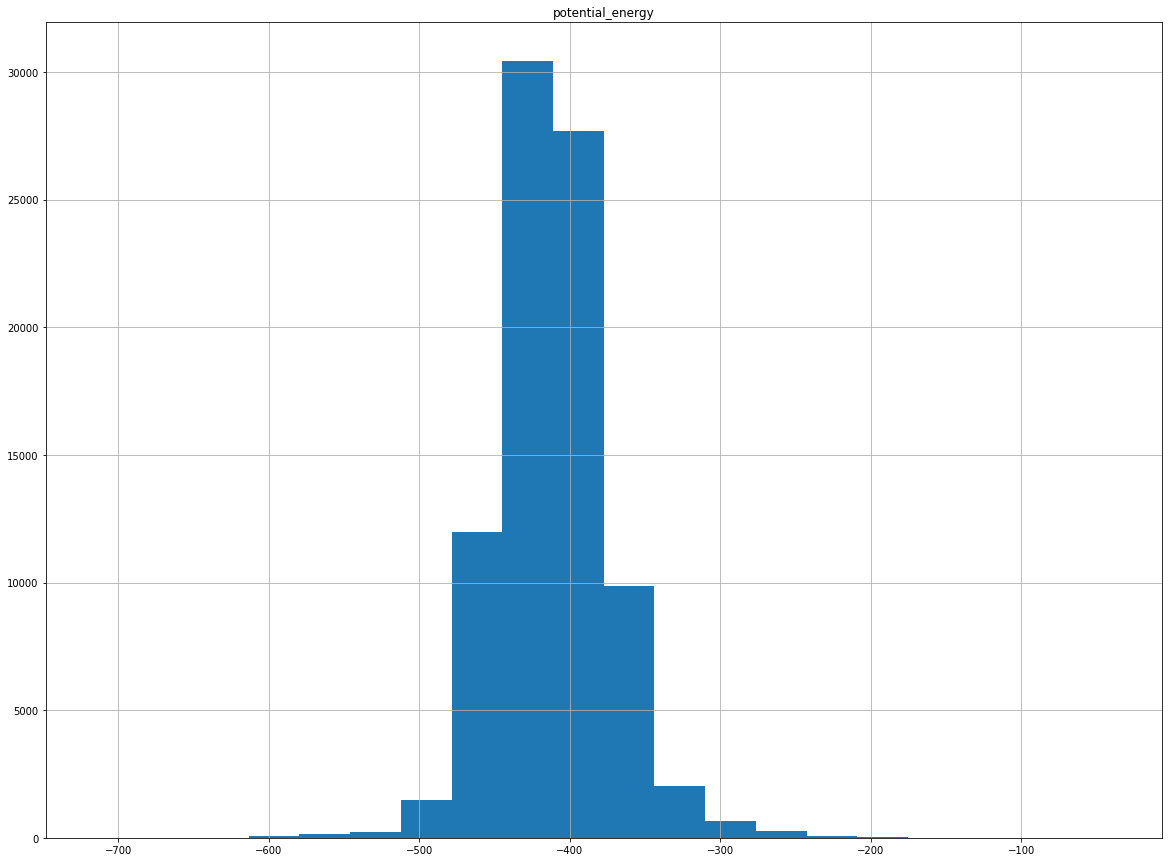

In [41]:
#check histgram of each potential_energy data
potential_energy.hist(bins=20, figsize=(20,15))

##mulliken_charges

In [42]:
mulliken_charges.head()

,molecule_name,atom_index,mulliken_charge
0,dsgdb9nsd_000001,0,-0.535689
1,dsgdb9nsd_000001,1,0.133921
2,dsgdb9nsd_000001,2,0.133922
3,dsgdb9nsd_000001,3,0.133923
4,dsgdb9nsd_000001,4,0.133923


In [43]:
mulliken_charges.describe()

,atom_index,mulliken_charge
count,1.533537e+06,1.533537e+06
mean,8.759199e+00,-2.256222e-10
std,5.592808e+00,2.254392e-01
min,0.000000e+00,-7.334500e-01
25%,4.000000e+00,-1.915330e-01
50%,9.000000e+00,9.867800e-02
75%,1.300000e+01,1.273960e-01
max,2.800000e+01,7.289810e-01


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1105e1a90>,
      dtype=object)

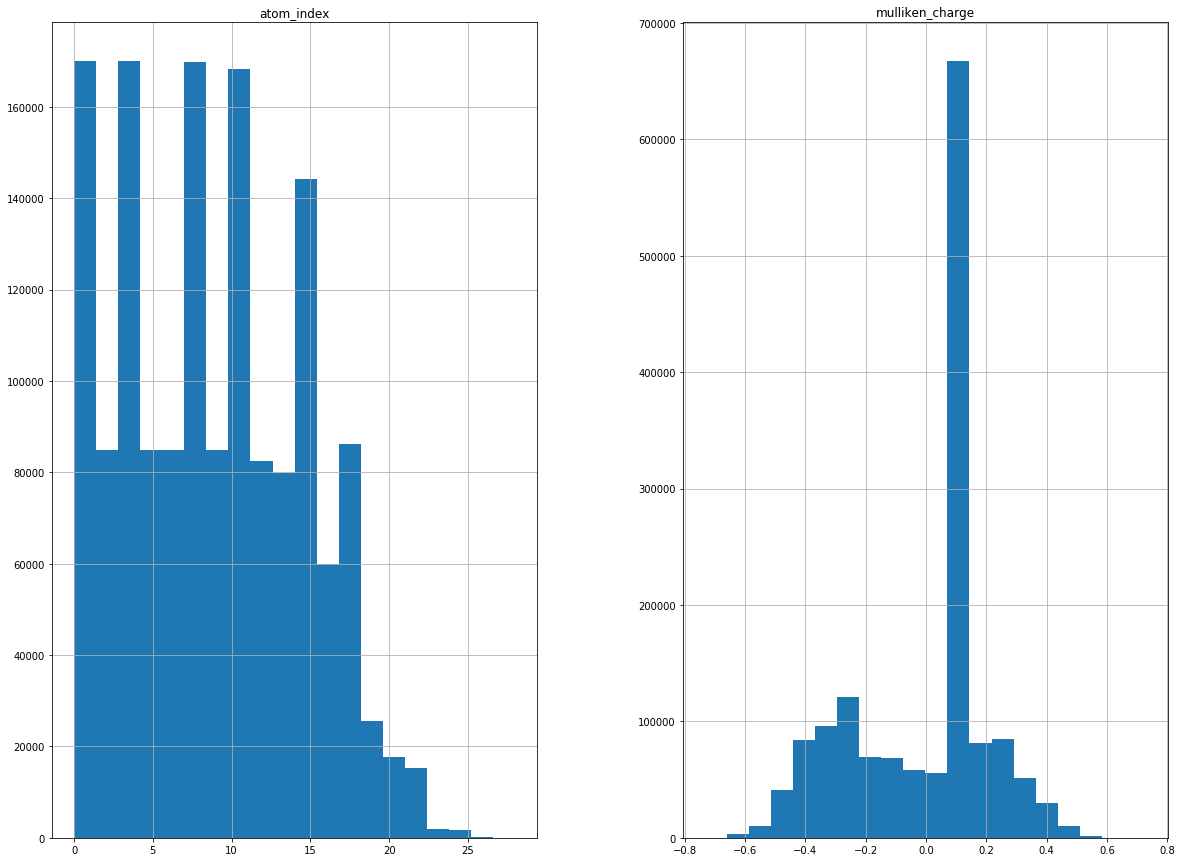

In [44]:
#check histgram of mulliken_charges data
mulliken_charges.hist(bins=20, figsize=(20,15))

The mulliken_charge histgram is bit strange shape. What is that peek?

Now, basic EDA was finished.  
Next EDA, I will conbine those dataset, and check　correlation and scatter plot and so on.
  
In below, I want to try other EDA package as trial. This package is good for EDA.

In [2]:
import pandas_profiling as pdp

In [5]:
pdp.ProfileReport(train)

Number of variables,6
Number of observations,4658147
Total Missing (%),0.0%
Total size in memory,213.2 MiB
Average record size in memory,48.0 B
Numeric,4
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,0


#Work still in progress